# Unit 5 - Financial Planning

In [220]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [221]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [222]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [223]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [224]:
# Fetch current BTC price - Step 1 : Use the requests library to fetch the current price
btc_request = requests.get(btc_url).json()
btc_request

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18897550,
   'total_supply': 18897550,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 48227.0,
     'volume_24h': 31380040726,
     'market_cap': 911917634433,
     'percentage_change_1h': 0.328692230034028,
     'percentage_change_24h': -0.607740176987327,
     'percentage_change_7d': -10.3362249159005,
     'percent_change_1h': 0.328692230034028,
     'percent_change_24h': -0.607740176987327,
     'percent_change_7d': -10.3362249159005},
    'CAD': {'price': 61368.8575,
     'volume_24h': 39931101823.835,
     'market_cap': 1160415189815.99,
     'percent_change_1h': 0.328692230034028,
     'percent_change_24h': -0.607740176987327,
     'percent_change_7d': -10.3362249159005}},
   'last_updated': 1639187323}},
 'metadata': {'timestamp': 1639187323,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [225]:
# Fetch current BTC price - Step 2 : Parse the API JSON response to select only the crypto prices and store each price in a variable
btc_price = btc_request["data"]["1"]["quotes"]["CAD"]["price"]
btc_price

61368.8575

In [226]:
# Fetch current ETH price - Step 1 : Use the requests library to fetch the current price
eth_request = requests.get(eth_url).json()
eth_request

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 118688427,
   'total_supply': 118688427,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3994.03,
     'volume_24h': 28565922517,
     'market_cap': 473639254787,
     'percentage_change_1h': 0.813092277237971,
     'percentage_change_24h': -4.16371300502494,
     'percentage_change_7d': -5.80466299697305,
     'percent_change_1h': 0.813092277237971,
     'percent_change_24h': -4.16371300502494,
     'percent_change_7d': -5.80466299697305},
    'CAD': {'price': 5082.403175,
     'volume_24h': 36350136402.8825,
     'market_cap': 602705951716.458,
     'percent_change_1h': 0.813092277237971,
     'percent_change_24h': -4.16371300502494,
     'percent_change_7d': -5.80466299697305}},
   'last_updated': 1639187237}},
 'metadata': {'timestamp': 1639187237,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [227]:
# Fetch current ETH price - Step 2 : Parse the API JSON response to select only the crypto prices and store each price in a variable
eth_price = eth_request["data"]["1027"]["quotes"]["CAD"]["price"]
eth_price

5082.403175

In [228]:
# Compute current value of my crpto - BTC
my_btc_value = my_btc * btc_price 
my_btc_value

73642.629

In [229]:
# Compute current value of my crpto - ETH
my_eth_value = my_eth * eth_price
my_eth_value

26936.7368275

In [230]:
# Compute current value of my crpto - BTC + ETH
total_crypto = my_btc_value + my_eth_value
total_crypto 

100579.3658275

In [231]:
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current total value of your {my_btc} BTC and {my_eth} ETH is ${total_crypto:0.2f}")

The current value of your 1.2 BTC is $73642.63
The current value of your 5.3 ETH is $26936.74
The current total value of your 1.2 BTC and 5.3 ETH is $100579.37


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [232]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [233]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

In [234]:
# Format current date as ISO format
today = pd.Timestamp("2021-12-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
spy_agg_df = api.get_barset(
    tickers,
    timeframe,
    start=today,
    end=today,
    limit=1000).df

# Preview DataFrame
spy_agg_df

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-12-10 00:00:00-05:00  114.37  114.51  114.22  114.24  6263328  469.23   

                                                            
                            high     low   close    volume  
time                                                        
2021-12-10 00:00:00-05:00  470.9  466.51  470.72  64958435

In [235]:
# Pick AGG and SPY close prices
agg_close_price = float(spy_agg_df["AGG"]["close"])
spy_close_price = float(spy_agg_df["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.24
Current SPY closing price: $470.72


In [236]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Compute current value of total shares - SPY + AGG
total_shares = my_spy_value + my_agg_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total current value of your {my_spy} SPY shares and {my_agg} AGG shares is ${total_shares:0.2f}")

The current value of your 50 SPY shares is $23536.00
The current value of your 200 AGG shares is $22848.00
The total current value of your 50 SPY shares and 200 AGG shares is $46384.00


### Savings Health Analysis

In [237]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data - combine total_crypto and total_shares
financial_assets = {
    "amount" : [total_crypto, total_shares]
}

# Set the index
asset_types = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(financial_assets, index=asset_types)

# Rounding the amount to 2 decimal values
df_savings["amount"] = df_savings["amount"].round(decimals=2)

# Display savings DataFrame
display(df_savings)

,amount
crypto,100579.37
shares,46384.00


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

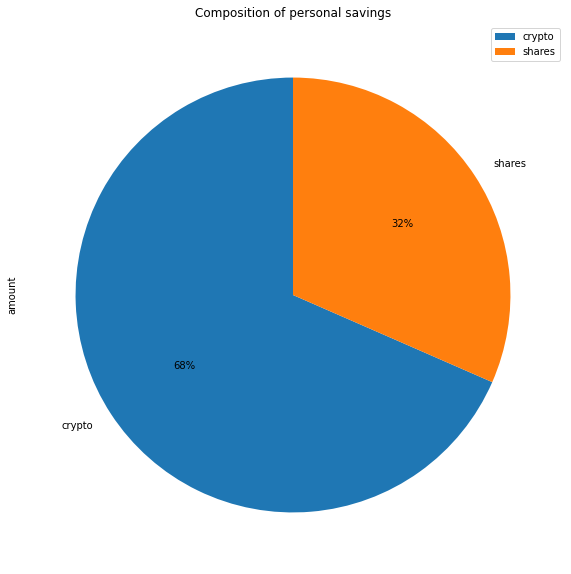

In [238]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title = "Composition of personal savings",  figsize=(15,10), autopct='%0.f%%', startangle=90)

In [239]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto + total_shares


# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print(f"Congratulations! You have reached the financial goal of having an ideal emergency fund")
elif total_savings < emergency_fund:
    print(f"You need additional ${emergency_fund-total_savings} to reach the goal of your emergency fund")

Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [240]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-12-10', tz='America/New_York').isoformat()

In [241]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Set the ticker information
tickers = ["SPY","AGG"]

df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000).df

# Display sample data
df_stock_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830  2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880  2952430   
2017-12-26 00:00:00-05:00  108.91  109.0100  108.8700  108.960  1717408   
2017-12-27 00:00:00-05:00  109.02  109.3250  109.0200  109.285  1863189   
2017-12-28 00:00:00-05:00  109.22  109.2599  109.1435  109.220  2490982   

                              SPY                                      
                             open     high      low   close    volume  
time                                                                   
2017-12-21 00:00:00-05:00  267.73  268.385  267.300  267.57  34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.900  267.48  36604044  
2017-12-26 00:00:00-05:00  267.06  267.390  266.885  267.17  24888478  
2017-12-27 00:00:00-05:00  267.36  267.730  267.010  267.33  32573906  
2017-12-28 00:00:00-05:00  267.85  267.920  267.450  267.86  23583584

In [242]:
# Remove the time portion of the date for easier viewing
df_stock_data.index = df_stock_data.index.date

# Display sample data
df_stock_data.head()

AGG                                           SPY           \
              open      high       low    close   volume    open     high   
2017-12-21  108.76  108.8700  108.7300  108.830  2173058  267.73  268.385   
2017-12-22  108.82  108.8900  108.8100  108.880  2952430  267.60  267.635   
2017-12-26  108.91  109.0100  108.8700  108.960  1717408  267.06  267.390   
2017-12-27  109.02  109.3250  109.0200  109.285  1863189  267.36  267.730   
2017-12-28  109.22  109.2599  109.1435  109.220  2490982  267.85  267.920   

                                       
                low   close    volume  
2017-12-21  267.300  267.57  34999954  
2017-12-22  266.900  267.48  36604044  
2017-12-26  266.885  267.17  24888478  
2017-12-27  267.010  267.33  32573906  
2017-12-28  267.450  267.86  23583584

In [243]:
# Drop the nulls
df_stock_data.dropna(inplace=True)

# Preview DataFrame
df_stock_data

AGG                                           SPY            \
              open      high       low    close   volume    open      high   
2017-12-21  108.76  108.8700  108.7300  108.830  2173058  267.73  268.3850   
2017-12-22  108.82  108.8900  108.8100  108.880  2952430  267.60  267.6350   
2017-12-26  108.91  109.0100  108.8700  108.960  1717408  267.06  267.3900   
2017-12-27  109.02  109.3250  109.0200  109.285  1863189  267.36  267.7300   
2017-12-28  109.22  109.2599  109.1435  109.220  2490982  267.85  267.9200   
...            ...       ...       ...      ...      ...     ...       ...   
2021-12-06  114.98  115.0391  114.6196  114.660  6364620  456.14  460.7900   
2021-12-07  114.52  114.7100  114.4500  114.475  5783341  464.41  468.8800   
2021-12-08  114.37  114.3700  114.0500  114.170  7416826  468.70  470.0000   
2021-12-09  114.28  114.3860  114.1200  114.200  8223995  468.15  469.6291   
2021-12-10  114.37  114.5100  114.2200  114.240  6263328  469.23  470.9000   

                                        
                 low   close    volume  
2017-12-21  267.3000  267.57  34999954  
2017-12-22  266.9000  267.48  36604044  
2017-12-26  266.8850  267.17  24888478  
2017-12-27  267.0100  267.33  32573906  
2017-12-28  267.4500  267.86  23583584  
...              ...     ...       ...  
2021-12-06  453.5600  458.78  88930961  
2021-12-07  458.6546  468.24  79124909  
2021-12-08  466.8300  469.54  62917411  
2021-12-09  466.1400  466.34  54963509  
2021-12-10  466.5100  470.72  64958435  

[1000 rows x 10 columns]

In [244]:
# Set the weights  - 60% stocks (SPY) and 40% bonds (AGG)
weights = [.4, .6]

# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyreturns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [245]:
# Printing the simulation input data
MC_thirtyreturns.portfolio_data.head()

AGG                                                        SPY  \
              open      high       low    close   volume daily_return    open   
2017-12-21  108.76  108.8700  108.7300  108.830  2173058          NaN  267.73   
2017-12-22  108.82  108.8900  108.8100  108.880  2952430     0.000459  267.60   
2017-12-26  108.91  109.0100  108.8700  108.960  1717408     0.000735  267.06   
2017-12-27  109.02  109.3250  109.0200  109.285  1863189     0.002983  267.36   
2017-12-28  109.22  109.2599  109.1435  109.220  2490982    -0.000595  267.85   

                                                             
               high      low   close    volume daily_return  
2017-12-21  268.385  267.300  267.57  34999954          NaN  
2017-12-22  267.635  266.900  267.48  36604044    -0.000336  
2017-12-26  267.390  266.885  267.17  24888478    -0.001159  
2017-12-27  267.730  267.010  267.33  32573906     0.000599  
2017-12-28  267.920  267.450  267.86  23583584     0.001983

In [246]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyreturns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/riteshchugani/Desktop/Unit5Homework/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009184,0.986017,1.003904,1.005825,0.994391,0.991824,0.995240,1.010273,1.016491,0.991402,...,1.009235,0.996226,1.007508,1.006581,0.996027,0.989386,1.007162,1.014590,1.006118,1.000835
2,0.996812,0.976313,0.998576,1.016633,0.990006,0.994790,1.026469,1.006852,1.015556,1.000936,...,1.005095,1.004456,1.013612,1.003930,0.999429,0.986051,1.012370,1.000335,1.001299,1.003502
3,0.999433,0.980647,0.996714,1.013577,0.995385,0.990397,1.030605,1.011562,1.030873,0.997712,...,1.016320,1.002612,1.013487,0.999470,0.980239,0.976203,1.009918,1.004021,1.001715,0.998198
4,0.977503,0.985304,0.990327,1.006045,1.002275,0.996057,1.027925,0.975763,1.034936,0.999158,...,1.001433,1.025171,1.003305,0.999785,0.979987,0.966582,1.015725,1.001745,0.991522,1.007283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,83.041066,6.400094,20.978685,8.442430,8.537726,16.915966,4.217176,7.576252,11.066310,2.305362,...,12.975992,15.532025,24.619589,3.922010,22.958950,10.588686,19.395505,7.768987,5.841061,39.537640
7557,83.395575,6.280673,20.768651,8.454618,8.552017,16.880161,4.196552,7.621843,11.065980,2.342447,...,13.025459,15.533789,24.626801,3.954744,23.207839,10.626688,18.971280,7.839805,5.868859,39.673015
7558,84.184368,6.240935,20.965672,8.468024,8.549082,16.979231,4.257366,7.702322,11.048976,2.333873,...,13.088784,15.632492,24.739967,3.962887,23.212567,10.624268,18.632259,7.872503,5.831745,39.449559
7559,84.293306,6.156412,21.050609,8.495037,8.512659,17.332199,4.220605,7.692114,10.963905,2.358873,...,13.020447,15.453271,24.982318,3.984752,23.250629,10.695411,18.770815,7.780209,5.817011,38.960176


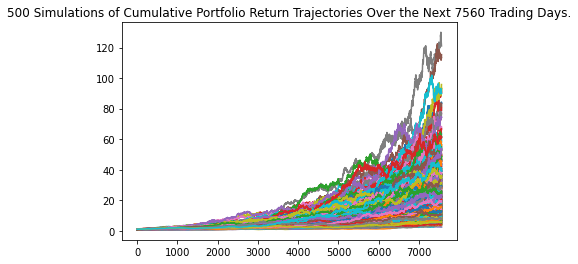

In [247]:
# Plot simulation outcomes
line_plot = MC_thirtyreturns.plot_simulation()

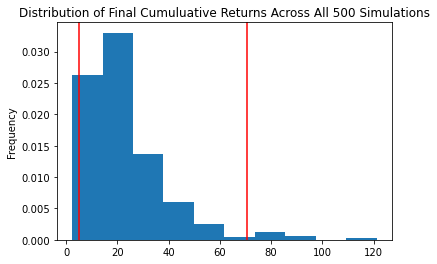

In [248]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyreturns.plot_distribution()

### Retirement Analysis

In [249]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_tbl = MC_thirtyreturns.summarize_cumulative_return()

# Print summary statistics
print(thirty_tbl)

count           500.000000
mean             23.209670
std              16.633071
min               2.377299
25%              12.459027
50%              18.830934
75%              29.205393
max             121.096105
95% CI Lower      5.046528
95% CI Upper     70.743357
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [250]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_tbl[8]*initial_investment,2)
ci_upper = round(thirty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $100930.56 and $1414867.14


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [251]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_tbl[8]*initial_investment,2)
ci_upper = round(thirty_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $151395.85 and $2122300.72


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [252]:
# Set the weights - Revising Weights to include more risk - 80% stocks (SPY) and 20% bonds (AGG)
weights = [.2, .8]

# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fivereturns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [253]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fivereturns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/riteshchugani/Desktop/Unit5Homework/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012230,0.999480,0.989485,1.003418,0.977428,0.984472,1.020766,1.013031,0.990139,0.996461,...,1.002067,1.004632,0.999296,1.002607,1.010179,0.996778,0.997900,1.011900,0.986261,0.994941
2,0.999132,0.974591,0.988891,1.015853,0.970650,0.984969,1.021344,1.024242,0.992630,0.979483,...,1.029444,1.004745,1.003472,1.009549,1.008548,0.981833,0.991598,1.037545,0.980789,1.010067
3,0.990004,0.975744,0.977417,1.012112,0.966650,0.983450,1.031732,1.040844,0.992007,0.996410,...,1.032908,1.009658,1.006501,1.015831,0.999173,0.981791,0.977394,1.024258,0.999400,1.012764
4,0.986065,0.997441,0.961041,1.013305,0.965557,0.980383,1.020231,1.052955,0.997606,0.994310,...,1.028349,1.010934,0.991594,1.017369,1.021603,0.974605,0.980505,1.027154,1.001457,0.985721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.169810,1.563178,2.411091,2.828088,3.562738,1.903125,2.128060,1.561465,1.316886,2.011275,...,1.479515,2.032285,2.614809,0.857451,2.918773,1.715519,1.482642,1.098758,4.308310,2.764233
1257,2.123946,1.581982,2.453700,2.801884,3.622762,1.889376,2.117797,1.554672,1.320955,2.004517,...,1.487060,2.043815,2.571323,0.867955,2.892052,1.736672,1.467213,1.105423,4.262289,2.756219
1258,2.169677,1.575879,2.428769,2.789454,3.648364,1.910733,2.145646,1.535282,1.332751,1.971452,...,1.466720,2.022240,2.593585,0.875624,2.863175,1.760094,1.484047,1.079311,4.252804,2.785227
1259,2.158657,1.557374,2.441195,2.775850,3.695765,1.902640,2.118098,1.546367,1.353979,1.994062,...,1.455169,2.063409,2.563227,0.862843,2.842058,1.797944,1.481617,1.077678,4.331200,2.817667


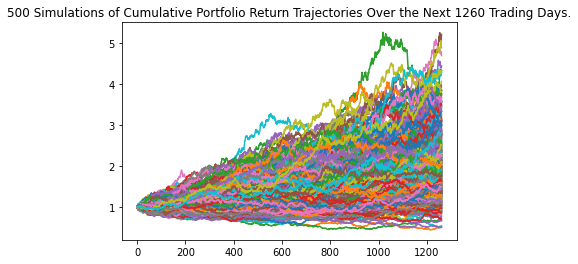

In [254]:
# Plot simulation outcomes
line_plot1 = MC_fivereturns.plot_simulation()

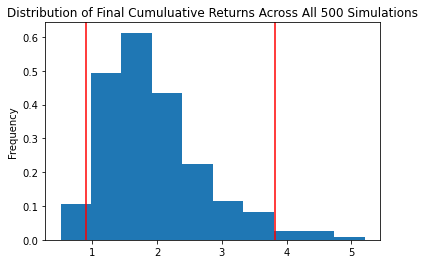

In [255]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_fivereturns.plot_distribution()

In [256]:
# Fetch summary statistics from the Monte Carlo simulation results
five_tbl = MC_fivereturns.summarize_cumulative_return()

# Print summary statistics
print(five_tbl)

count           500.000000
mean              1.944447
std               0.766636
min               0.505953
25%               1.404208
50%               1.801930
75%               2.328686
max               5.209005
95% CI Lower      0.893104
95% CI Upper      3.821594
Name: 1260, dtype: float64


In [257]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_five = round(five_tbl[8]*initial_investment,2)
ci_upper_five = round(five_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $17862.09 and $76431.89


### Ten Years Retirement Option

In [258]:
# Set the weights - 60% stocks (SPY) and 40% bonds (AGG)
weights = [.4, .6]

# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenreturns = MCSimulation(
    portfolio_data = df_stock_data,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*10
)

In [259]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenreturns.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/riteshchugani/Desktop/Unit5Homework/05-APIs/Unit 5 Homework/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001269,0.999518,0.986748,0.991761,1.016940,1.003022,0.994246,1.009916,0.995268,1.006756,...,0.998403,1.013739,1.001685,0.996671,0.981173,0.994889,0.988203,0.988357,1.003306,1.019847
2,0.994903,0.994856,0.983920,0.991401,1.013055,1.007573,0.994890,1.002705,0.985141,1.010025,...,1.002299,1.026126,0.995710,1.005670,0.973199,0.991343,0.992670,0.988894,1.014556,1.028196
3,0.993384,0.990005,0.996324,0.988243,1.007701,0.987108,0.986809,0.999384,0.989487,0.999953,...,1.002078,1.013958,0.990913,1.020040,0.977728,0.986787,0.996546,0.992515,1.013269,1.032130
4,0.989222,0.980716,0.995868,0.992289,1.015610,0.983978,0.981308,0.998445,0.981057,1.014194,...,0.997422,1.004784,0.991719,1.004956,0.991110,0.987542,0.993501,0.984069,1.007972,1.044181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.938478,2.010509,1.612784,2.374884,6.504840,2.979898,2.573511,1.561782,1.672942,1.312173,...,3.220260,2.183262,4.913755,2.665967,4.311488,2.170911,2.748891,3.041751,1.551144,1.888124
2517,1.941480,2.024038,1.610638,2.376452,6.542466,2.989872,2.546379,1.552838,1.661313,1.319878,...,3.241082,2.206296,4.955777,2.682556,4.335103,2.156600,2.741794,3.040900,1.540796,1.904157
2518,1.956170,2.023393,1.589678,2.370654,6.597714,2.997693,2.539374,1.557618,1.665700,1.312455,...,3.283683,2.222323,4.946608,2.678665,4.356229,2.148148,2.722580,3.057489,1.545108,1.922273
2519,1.932060,2.015066,1.564584,2.377886,6.643798,3.033448,2.539125,1.558310,1.661543,1.304748,...,3.321415,2.217570,4.981054,2.707444,4.366401,2.149587,2.722955,3.028624,1.533341,1.908295


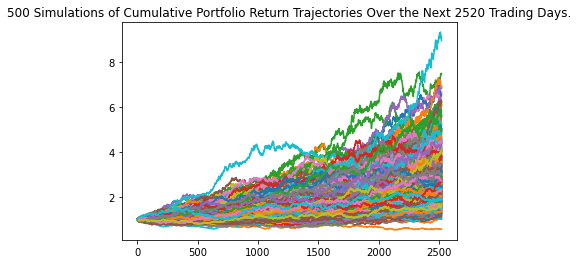

In [260]:
# Plot simulation outcomes
line_plot2 = MC_tenreturns.plot_simulation()

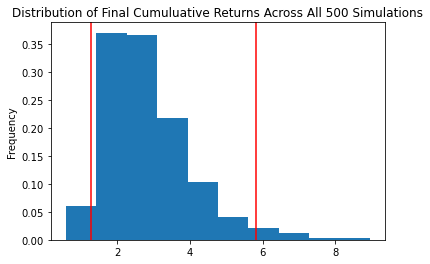

In [261]:
# Plot probability distribution and confidence intervals
dist_plot1 = MC_tenreturns.plot_distribution()

In [262]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_tbl = MC_tenreturns.summarize_cumulative_return()

# Print summary statistics
print(ten_tbl)

count           500.000000
mean              2.835223
std               1.159289
min               0.582104
25%               2.024506
50%               2.628496
75%               3.391042
max               8.959160
95% CI Lower      1.280274
95% CI Upper      5.804490
Name: 2520, dtype: float64


In [263]:
# Set initial investment
initial_investment = 40000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_ten = round(ten_tbl[8]*initial_investment,2)
ci_upper_ten = round(ten_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $40000 in the portfolio over the next 10 years will end within in the range of $51210.96 and $232179.6
